# A/B Testing

## Dependency

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## Parameter

In [37]:
CSV_01 = '../data/ab_test.csv'
ALPHA = 0.05

## Load data

In [13]:
df = pd.read_csv(CSV_01)
df.columns = [c.strip() for c in df.columns]

In [14]:
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [22]:
df_plot = df.copy()
df_plot = df_plot.set_index('Day')
df_plot = df_plot.stack().reset_index().rename(columns={
    'level_1': 'group',
    0: 'conversion'
})

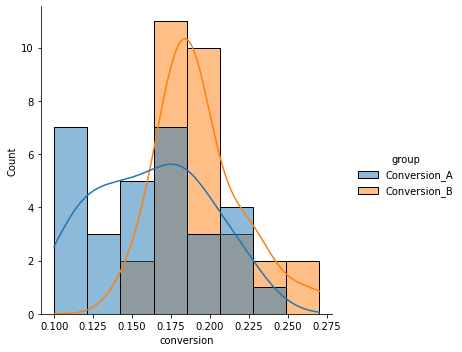

In [24]:
sns.displot(df_plot, x='conversion', hue='group', kde=True)
plt.show()

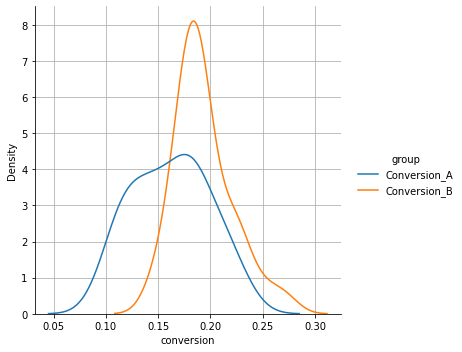

In [26]:
sns.displot(df_plot, x='conversion', hue='group', kind='kde')
plt.grid()
plt.show()

## Two-sample T-test

In [35]:
# B is test variant group, and A is control group
statistic, pvalue = ss.ttest_ind(df['Conversion_B'], df['Conversion_A'])

In [38]:
print(f'T-statistic: {statistic:.2f}')
print(f'P-value: {pvalue:.4f}')
print(f'Mean, A: {df["Conversion_A"].mean():.3f}, B: {df["Conversion_B"].mean():.3f}')
print(f'p-value is less than alpha: {ALPHA}, so reject null hypothesis, meaning there is difference and B is better than A')

T-statistic: 3.79
P-value: 0.0004
Mean, A: 0.162, B: 0.193
p-value is less than alpha: 0.05, so reject null hypothesis, meaning there is difference and B is better than A


## Reference
- [A/B Testing for Data Science using Python – A Must-Read Guide for Data Scientists](https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/)